In [31]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

In [32]:
tickers=pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]
tickers

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,1.54%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.64%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.80%
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,NaN,2.93%
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.04%
5,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.36%
6,Caterpillar,NYSE,CAT,Construction and mining,1991-05-06,NaN,5.45%
7,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,2.59%
8,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.81%
9,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.02%


In [33]:
data=yf.download(tickers.Symbol.to_list(),'2021-01-01')['Adj Close']

[*********************100%%**********************]  30 of 30 completed


In [34]:
data

,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,126.830078,202.947891,159.331497,112.792076,202.720001,169.422409,220.022583,39.863834,73.209137,177.102798,...,120.373322,69.814461,211.224319,135.337128,126.315643,126.381714,333.932343,212.323700,48.120457,46.305023
2021-01-05,128.398193,203.932816,160.925507,113.394058,211.630005,170.808289,221.231018,39.881977,75.188232,177.860336,...,120.170197,69.935211,211.428070,136.428711,127.122169,125.338257,329.441681,209.154816,47.899681,46.058533
2021-01-06,124.076088,208.848450,156.919006,117.588882,211.029999,180.314209,215.868011,40.262840,77.608086,178.538116,...,121.998199,71.038986,205.945877,137.510651,128.460281,129.596024,343.267120,207.312012,48.480236,46.346100
2021-01-07,128.309937,209.537918,158.108002,116.658768,212.710007,180.658325,217.695633,40.770660,77.971077,177.999878,...,118.867516,72.453217,211.806503,140.022202,127.259659,129.568069,348.770630,208.472305,48.371147,46.342930
2021-01-08,129.417450,213.540314,159.134995,116.773819,209.899994,180.686234,221.750320,40.861343,78.714310,178.109528,...,116.696350,71.599503,213.096985,141.374664,127.204674,130.108429,347.203674,210.071365,47.767841,46.336624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-14,187.429993,309.213806,187.070007,241.529999,180.759995,358.179993,276.799988,48.950001,161.974396,105.349998,...,100.080002,128.660004,415.809998,92.790001,165.759995,217.589996,513.880005,277.226929,40.490002,59.860001
2024-05-15,189.720001,316.790009,185.990005,241.699997,176.990005,360.040009,287.540009,49.669998,161.419998,102.769997,...,101.239998,131.729996,423.079987,91.669998,166.509995,214.350006,517.549988,280.979980,40.490002,59.830002
2024-05-16,189.839996,314.720001,183.630005,241.320007,182.960007,350.720001,284.679993,48.340000,161.089996,103.370003,...,104.860001,130.880005,420.989990,91.769997,167.860001,219.220001,521.270020,279.839996,40.250000,64.010002


In [35]:
returns=data.pct_change().dropna()

In [36]:
expected_returns=returns.mean() * 252
cov_matirx=returns.cov() * 252

In [37]:
def portfolio_variance(W):
    return (W.dot(cov_matrix)).dot(W)

In [38]:
returns

,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.012364,0.004853,0.010004,0.005337,0.043952,0.008180,0.005492,0.000455,0.027033,0.004277,...,-0.001687,0.001730,0.000965,0.008066,0.006385,-0.008256,-0.013448,-0.014925,-0.004588,-0.005323
2021-01-06,-0.033662,0.024104,-0.024897,0.036993,-0.002835,0.055653,-0.024242,0.009550,0.032184,0.003811,...,0.015212,0.015783,-0.025929,0.007930,0.010526,0.033970,0.041966,-0.008811,0.012120,0.006244
2021-01-07,0.034123,0.003301,0.007577,-0.007910,0.007961,0.001908,0.008466,0.012613,0.004677,-0.003015,...,-0.025662,0.019908,0.028457,0.018264,-0.009346,-0.000216,0.016033,0.005597,-0.002250,-0.000068
2021-01-08,0.008632,0.019101,0.006496,0.000986,-0.013211,0.000154,0.018625,0.002224,0.009532,0.000616,...,-0.018265,-0.011783,0.006093,0.009659,-0.000432,0.004170,-0.004493,0.007670,-0.012472,-0.000136
2021-01-11,-0.023249,-0.003858,-0.021519,-0.005912,-0.014817,-0.002059,-0.017069,0.006658,0.005709,0.002238,...,-0.008522,0.023727,-0.009698,0.004783,-0.006773,-0.015897,-0.007265,-0.011882,-0.005882,0.004501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-14,0.006173,0.009596,0.002680,0.012068,0.013002,0.004205,-0.002594,0.005546,-0.005592,-0.004536,...,0.004517,-0.004873,0.006865,0.000755,-0.000663,0.004663,0.004182,-0.005906,-0.001233,-0.009104
2024-05-15,0.012218,0.024502,-0.005773,0.000704,-0.020856,0.005193,0.038801,0.014709,-0.003423,-0.024490,...,0.011591,0.023861,0.017484,-0.012070,0.004525,-0.014890,0.007142,0.013538,0.000000,-0.000501
2024-05-16,0.000632,-0.006534,-0.012689,-0.001572,0.033731,-0.025886,-0.009946,-0.026777,-0.002044,0.005838,...,0.035757,-0.006453,-0.004940,0.001091,0.008108,0.022720,0.007188,-0.004057,-0.005927,0.069865


In [39]:
n_assets=len(data.columns)
n_assets

30

In [40]:
1/30

0.03333333333333333

In [41]:
initial_weights=np.array([1/n_assets for i in range(n_assets)])
initial_weights

array([0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333])

In [42]:
#three target returns

In [43]:
np.linspace(0,10,3)# 0,5,10 because 3 target retuns which are equally spaced.

array([ 0.,  5., 10.])

In [44]:
target_returns=np.linspace(expected_returns.min(),expected_returns.max(),50)

In [45]:
target_returns

array([-0.11525498, -0.10735853, -0.09946207, -0.09156562, -0.08366916,
       -0.07577271, -0.06787625, -0.0599798 , -0.05208334, -0.04418689,
       -0.03629043, -0.02839398, -0.02049752, -0.01260107, -0.00470461,
        0.00319184,  0.0110883 ,  0.01898475,  0.02688121,  0.03477766,
        0.04267412,  0.05057057,  0.05846703,  0.06636348,  0.07425994,
        0.08215639,  0.09005285,  0.0979493 ,  0.10584576,  0.11374221,
        0.12163867,  0.12953512,  0.13743158,  0.14532803,  0.15322449,
        0.16112094,  0.1690174 ,  0.17691385,  0.18481031,  0.19270676,
        0.20060322,  0.20849967,  0.21639613,  0.22429258,  0.23218904,
        0.24008549,  0.24798195,  0.2558784 ,  0.26377486,  0.27167131])

In [46]:
import numpy as np
from scipy.optimize import minimize

target_vol=[]
for target_return in target_returns:
    constraints =({'type':'eq','fun': lambda x: np.sum(x)-1},
                {'type':'eq','fun': lambda x: x.dot(expected_returns)-target_return}) #sum should be zero
    bounds=[(0,1)] * n_assets

    result=minimize(portfolio_variance,initial_weights,method='SLSQP',bounds=bounds,constraints=constraints)
    target_vols.append(result.fun**(1/2))

#https://www.youtube.com/watch?v=BNTaj2jGZVQ

# target_vols = []

# # def portfolio_variance(weights):
# #     return weights.T @ cov_matrix @ weights

# for target_return in target_returns:
#     constraints = (
#         {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
#         {'type': 'eq', 'fun': lambda x: x.dot(expected_returns) - target_return}
#     )
#     bounds = [(0, 1)] * n_assets

#     result = minimize(portfolio_variance, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
#     if result.success:
#         target_vols.append(result.fun ** 0.5)
#     else:
#         target_vols.append(np.nan)  # Append NaN if optimization fails

# # # Remove NaN values to ensure x and y have the same size
# # clean_target_vols = [vol for vol in target_vols if not np.isnan(vol)]
# # clean_target_returns = [ret for vol, ret in zip(target_vols, target_returns) if not np.isnan(vol)]

# # Plotting the efficient frontier
# plt.scatter(clean_target_vols, clean_target_returns, label='EF')
# plt.xlabel('Vol (std)')
# plt.ylabel('Expected Return')
# plt.title('Efficient Frontier for the Dow Jones Industrial Average')
# plt.legend()
# plt.show()

NameError: name 'cov_matrix' is not defined

Length of target_vols: 50
Length of target_returns: 50


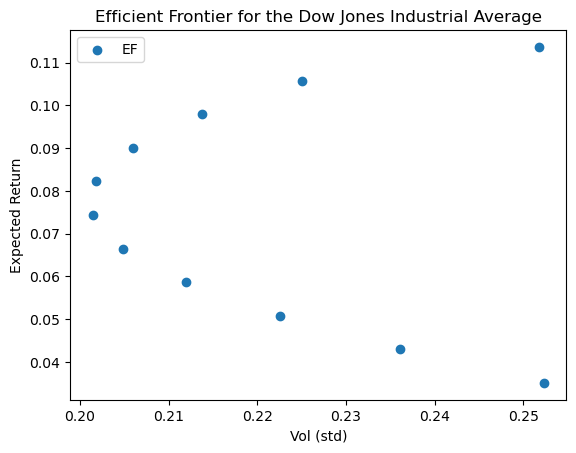

In [53]:
# import numpy as np
# from scipy.optimize import minimize
# import matplotlib.pyplot as plt

# # Dummy data for expected_returns and initial_weights
# expected_returns = np.array([0.12, 0.10, 0.07, 0.03])
# initial_weights = np.array([0.25, 0.25, 0.25, 0.25])
# n_assets = len(expected_returns)

# # Covariance matrix (example)
# cov_matrix = np.array([
#     [0.1, 0.02, 0.04, 0.01],
#     [0.02, 0.08, 0.02, 0.03],
#     [0.04, 0.02, 0.09, 0.05],
#     [0.01, 0.03, 0.05, 0.07]
# ])

# # Given target_returns array
# target_returns = np.array([
#     -0.11412822, -0.10627313, -0.09841803, -0.09056293, -0.08270783,
#     -0.07485273, -0.06699763, -0.05914253, -0.05128743, -0.04343234,
#     -0.03557724, -0.02772214, -0.01986704, -0.01201194, -0.00415684,
#      0.00369826,  0.01155336,  0.01940845,  0.02726355,  0.03511865,
#      0.04297375,  0.05082885,  0.05868395,  0.06653905,  0.07439415,
#      0.08224924,  0.09010434,  0.09795944,  0.10581454,  0.11366964,
#      0.12152474,  0.12937984,  0.13723494,  0.14509004,  0.15294513,
#      0.16080023,  0.16865533,  0.17651043,  0.18436553,  0.19222063,
#      0.20007573,  0.20793083,  0.21578592,  0.22364102,  0.23149612,
#      0.23935122,  0.24720632,  0.25506142,  0.26291652,  0.27077162
# ])

# # Function to calculate portfolio variance
# def portfolio_variance(weights):
#     return weights.T @ cov_matrix @ weights

# List to store the calculated volatilities
target_vols = []

# Optimize the portfolio for each target return
for target_return in target_returns:
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: x.dot(expected_returns) - target_return}
    )
    bounds = [(0, 1)] * n_assets

    result = minimize(portfolio_variance, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    
    if result.success:
        target_vols.append(result.fun ** 0.5)
    else:
        target_vols.append(np.nan)  # Append NaN if optimization fails

# Debug: Print lengths
print(f"Length of target_vols: {len(target_vols)}")
print(f"Length of target_returns: {len(target_returns)}")

# Remove NaN values to ensure x and y have the same size
# clean_target_vols = [vol for vol in target_vols if not np.isnan(vol)]
# clean_target_returns = [ret for vol, ret in zip(target_vols, target_returns) if not np.isnan(vol)]

# Debug: Print lengths after cleaning
# print(f"Length of clean_target_vols: {len(clean_target_vols)}")
# print(f"Length of clean_target_returns: {len(clean_target_returns)}")

# Plotting the efficient frontier
plt.scatter(target_vols,target_returns, label='EF')
plt.xlabel('Vol (std)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier for the Dow Jones Industrial Average')
plt.legend()
plt.show()
